In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


Explanation:

datasets.cifar10.load_data(): This function is part of the tensorflow.keras.datasets module. It downloads (if not already available locally) and loads the CIFAR-10 dataset.
The function returns two tuples:
The first tuple (train_images, train_labels) contains the training data and corresponding labels.
The second tuple (test_images, test_labels) contains the test data and corresponding labels.
After this step, train_images and test_images are numpy arrays of shape (50000, 32, 32, 3) and (10000, 32, 32, 3), respectively. Each image is 32x32 pixels and has 3 color channels (RGB). The labels are arrays of integers ranging from 0 to 9, representing the 10 classes.

train_images.astype('float32') / 255.0 and test_images.astype('float32') / 255.0 -->convert pixel values from integers (0 to 255) to floating-point numbers between 0 and 1.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


170500096/170498071 [==============================] - 51s 0us/step


layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)): This adds a 2D convolutional layer.
32: The number of filters (also known as kernels or feature maps). This layer will learn 32 filters.
(3, 3): The dimensions of the filters, meaning each filter is 3x3 pixels.
activation='relu': The ReLU (Rectified Linear Unit) activation function is applied to introduce non-linearity.
input_shape=(32, 32, 3): The shape of the input data. CIFAR-10 images are 32x32 pixels with 3 color channels (RGB).

layers.Flatten(): This layer flattens the input. It converts the 2D matrix into a 1D vector. For example, if the output from the last convolutional layer is 8x8x64, Flatten will convert this to a vector of size 4096 (8864).

layers.Dense(64, activation='relu'): This adds a densely connected layer.
64: The number of neurons in the layer.
activation='relu': ReLU activation function.

layers.Dense(10, activation='softmax'): This adds the output layer.
10: The number of neurons in the layer, corresponding to the 10 classes in the CIFAR-10 dataset.
activation='softmax': The softmax activation function is used to produce a probability distribution over the 10 classes.

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5039 - accuracy: 0.4492 - val_loss: 1.3045 - val_accuracy: 0.5327
Epoch 2/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.1484 - accuracy: 0.5940 - val_loss: 1.1026 - val_accuracy: 0.6112
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0010 - accuracy: 0.6479 - val_loss: 1.0445 - val_accuracy: 0.6307
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9063 - accuracy: 0.6808 - val_loss: 0.9481 - val_accuracy: 0.6677
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8382 - accuracy: 0.7064 - val_loss: 0.9090 - val_accuracy: 0.6819
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7770 - accuracy: 0.7280 - val_loss: 0.9428 - val_accuracy: 0.6778
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7242 - accuracy: 0.7454 - val_loss: 0.9164 -

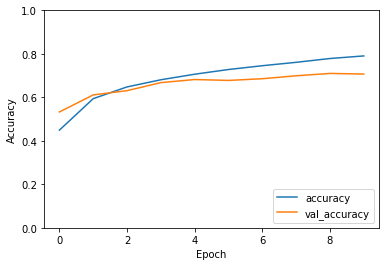

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


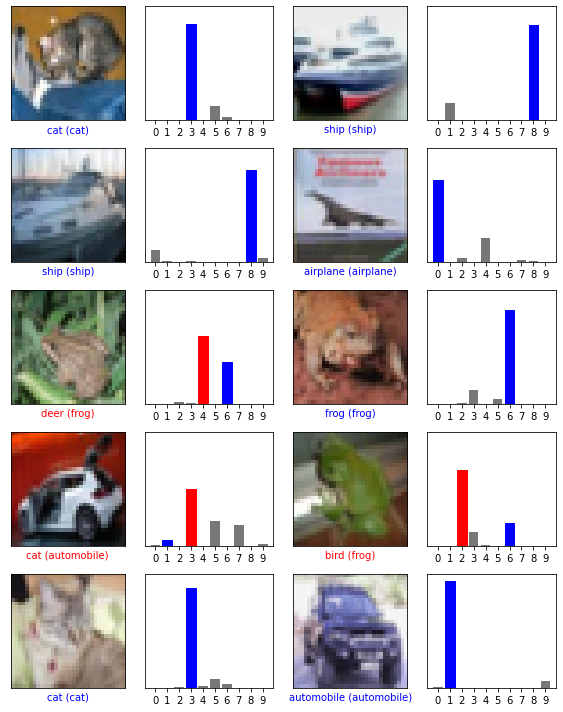

In [11]:
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label[0]]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue, incorrect predictions in red.

num_rows = 5
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()




